In [5]:
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt

In [118]:
mouse = "GX010154"
f = "results/" + mouse + "/" + mouse
df = pd.read_csv(f+"_control.csv")
df

,Unnamed: 0,Interval,Subject Type,Frame Index,Timestamp(x),Orbital,Nose,Ears,Whiskers,Cheek,Total Grimace Score,AU Scored,Confidence(Orbital),Confidence(Nose),Confidence(Ears),Confidence(Whiskers),Confidence(Cheek),Face Model,MGS Model
0,0,Clip 1: 2024-04-18_anishaiyer_0-30_GX010154.mp...,c57bl/6,0,0.000000,1,2,2,2,NaN,7.0,4,0.818520,0.999841,0.999910,0.999972,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
1,1,Clip 1: 2024-04-18_anishaiyer_0-30_GX010154.mp...,c57bl/6,240,1.001001,1,-1,2,-1,NaN,NaN,2,0.899838,0.000000,0.999984,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
2,2,Clip 1: 2024-04-18_anishaiyer_0-30_GX010154.mp...,c57bl/6,480,2.002002,1,-1,2,2,NaN,NaN,3,0.715737,0.000000,0.999999,1.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
3,3,Clip 1: 2024-04-18_anishaiyer_0-30_GX010154.mp...,c57bl/6,720,3.003003,1,-1,1,-1,NaN,NaN,2,0.990668,0.000000,0.585202,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
4,4,Clip 1: 2024-04-18_anishaiyer_0-30_GX010154.mp...,c57bl/6,960,4.004004,-1,0,-1,-1,NaN,NaN,1,0.000000,0.984831,0.000000,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,Clip 4: 2024-04-18_anishaiyer_90-120_GX010154....,c57bl/6,24720,103.013013,0,-1,2,-1,NaN,NaN,2,0.999290,0.000000,0.998866,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
104,104,Clip 4: 2024-04-18_anishaiyer_90-120_GX010154....,c57bl/6,24960,104.014014,-1,-1,1,-1,NaN,NaN,1,0.000000,0.000000,0.887828,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
105,105,Clip 4: 2024-04-18_anishaiyer_90-120_GX010154....,c57bl/6,25200,105.015015,-1,-1,-1,-1,NaN,NaN,0,0.000000,0.000000,0.000000,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901
106,106,Clip 4: 2024-04-18_anishaiyer_90-120_GX010154....,c57bl/6,25440,106.016016,-1,-1,-1,-1,NaN,NaN,0,0.000000,0.000000,0.000000,0.000000,NaN,general/fau/generalv5,c57bl6-pain-mgs-20220901


In [9]:
df.shape[0]

897

In [431]:
def check_total_grimace(mouse):
    print(mouse)
    
    full = (f+".csv")
    pre = (f+"_control.csv")
    post = (f+"_treated.csv")
    
    # full
    df = pd.read_csv(full)
    vals = df.loc[:, 'Total Grimace Score'].values
    new_df = df.dropna(subset=['Total Grimace Score'])
    non_nans = vals[~np.isnan(vals)]
    new_df.to_csv(mouse + '_full.csv')
    print("*** FULL ***")
    print("number of viable values for Total Grimace Score", len(non_nans))
    print("number of total values for Total Grimace Score", len(vals))
    print("average MGS score: ", np.mean(non_nans))
    print("median MGS score: ", np.median(non_nans))
    print("percent retained: ", str(100*len(non_nans)/len(vals)), "%\n")
    
    # pre
    df = pd.read_csv(pre)
    vals = df.loc[:, 'Total Grimace Score'].values
    new_df = df.dropna(subset=['Total Grimace Score'])
    non_nans = vals[~np.isnan(vals)]
    new_df.to_csv(mouse + '_pre_treatment.csv')
    print("*** PRE-TREAMTENT ***")
    print("number of viable values for Total Grimace Score", len(non_nans))
    print("number of total values for Total Grimace Score", len(vals))
    print("average MGS score: ", np.mean(non_nans))
    print("median MGS score: ", np.median(non_nans))
    print("percent retained: ", str(100*len(non_nans)/len(vals)), "%\n")
    
    
    # post
    df = pd.read_csv(post)
    vals = df.loc[:, 'Total Grimace Score'].values
    new_df = df.dropna(subset=['Total Grimace Score'])
    non_nans = vals[~np.isnan(vals)]
    new_df.to_csv(mouse + '_post_treatment.csv')
    
    print("*** POST-TREAMTENT ***")
    print("number of viable values for Total Grimace Score", len(non_nans))
    print("number of total values for Total Grimace Score", len(vals))
    print("average MGS score: ", np.mean(non_nans))
    print("median MGS score: ", np.median(non_nans))
    print("percent retained: ", str(100*len(non_nans)/len(vals)), "%\n")
    
    
mouse = "GX010160"
f = "results/" + mouse + "/" + mouse
check_total_grimace(f)

results/GX010160/GX010160
*** FULL ***
number of viable values for Total Grimace Score 119
number of total values for Total Grimace Score 788
average MGS score:  3.1092436974789917
median MGS score:  3.0
percent retained:  15.101522842639595 %

*** PRE-TREAMTENT ***
number of viable values for Total Grimace Score 0
number of total values for Total Grimace Score 47
average MGS score:  nan
median MGS score:  nan
percent retained:  0.0 %

*** POST-TREAMTENT ***
number of viable values for Total Grimace Score 118
number of total values for Total Grimace Score 674
average MGS score:  3.110169491525424
median MGS score:  3.0
percent retained:  17.50741839762611 %



/Users/anishaiyer/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anishaiyer/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


each mouse:
- 1 figure: run raw visualization code (bar chart for all viable points over time, pre and post with dotted lines)
- processing: binning
    - bin over 100s intervals for each mouse
    - put into 1 df with treatment group information
- histogram before and after treatment
- summative statistics (check_total_grimace())

summative:
- binned over time:
    - average binned data across treatment groups
    - plot 1 summative figure with traces for each treatment condition

In [438]:
POSTTREATMENT_START_TIME = 188 #needs to be inputted MANUALLY
MOUSE_NAME = 'GX010154'
SUFFIX = "_full.csv"
FILEPATH = "results/" + MOUSE_NAME + "/" + MOUSE_NAME + SUFFIX
print(FILEPATH)

df = pd.read_csv(FILEPATH)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the data for the shift
shifted_x = df['Unnamed: 0'] - POSTTREATMENT_START_TIME

# Determine colors for bars based on the condition (now using the shifted x-values)
colors = ['orange' if x > 0 else 'blue' for x in shifted_x]
bars = ax.bar(shifted_x, df['Total Grimace Score'], width=2, color=colors)

# Add scatter plot on top of the bar plot with color conditions (using the shifted x-values)
dot_colors = ['orange' if x > 0 else 'blue' for x in shifted_x]
ax.scatter(shifted_x, df['Total Grimace Score'], color=dot_colors)

# Add vertical dashed line at new x = 0
plt.axvline(x=0, color='red', linestyle='--', label='Start of Post-Treatment')

plt.xlabel('Time (s) after treatment')
plt.ylabel('Total Grimace Score')
plt.title(f'{MOUSE_NAME} Grimace Scores over Time')

# Adjusting x-ticks: set ticks and labels for every 50 values before and after 0
min_tick = int(shifted_x.min() // 50) * 50
max_tick = int(shifted_x.max() // 50) * 50
ticks = np.arange(min_tick, max_tick + 1, 50)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)  # Labels now represent the shifted values

plt.legend()

# Set the minimum y-axis limit slightly below zero to make zero values visible
ax.set_ylim(bottom=-0, top=8)  # Adjust as needed

plt.show()

results/GX010154/GX010154_full.csv


TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [452]:
sum_of_posts = pd.DataFrame()

sums = {}

Text(0.5, 1.0, 'GX010160 Post-Treatment Grimace Scores')

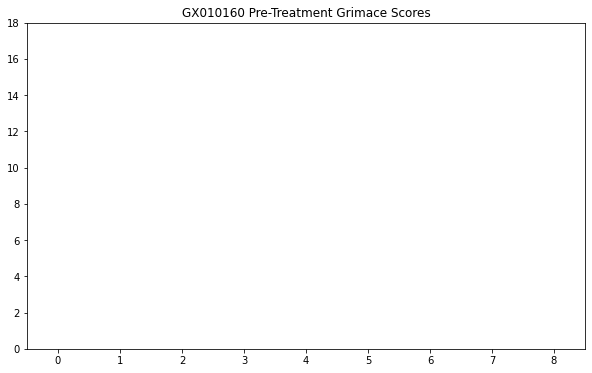

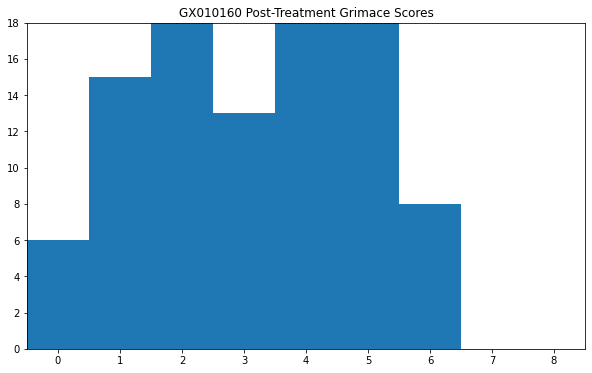

In [468]:
# HISTOGRAM

MOUSE_NAME = 'GX010160'
PRESUFFIX = "_pre_treatment.csv"
POSTSUFFIX = "_post_treatment.csv"
PREFILEPATH = "results/" + MOUSE_NAME + "/" + MOUSE_NAME + PRESUFFIX
POSTFILEPATH = "results/" + MOUSE_NAME + "/" + MOUSE_NAME + POSTSUFFIX

# Load the data
pre = pd.read_csv(PREFILEPATH)
post = pd.read_csv(POSTFILEPATH)

# Plot the binned data
plt.figure(figsize=(10, 6))
plt.xlim(-0.5, 8.5)
plt.ylim(0, 18)
plt.hist(pre['Total Grimace Score'], np.array(range(8))-0.5)
plt.title(f'{MOUSE_NAME} Pre-Treatment Grimace Scores')
#plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(-0.5, 8.5)
plt.ylim(0, 18)
plt.hist(post['Total Grimace Score'], np.array(range(8))-0.5)
plt.title(f'{MOUSE_NAME} Post-Treatment Grimace Scores')
#plt.show()

In [478]:
sums[MOUSE_NAME] = sum(post['Total Grimace Score'].values)

sums

{'GX010154': 130.0,
 'GX010153': 81.0,
 'GX010155': 17.0,
 'GX010156': 208.0,
 'GX010157': 167.0,
 'GX010158': 27.0,
 'GX010160': 367.0}

In [481]:
all_sums = pd.DataFrame(sums.values(), sums.keys())
all_sums['Group'] = [key[i] for i in all_sums.index.values]
all_sums.to_csv("all_sums.csv")

,0,Group
GX010154,130.0,A
GX010153,81.0,C
GX010155,17.0,B
GX010156,208.0,B
GX010157,167.0,C
GX010158,27.0,A
GX010160,367.0,A


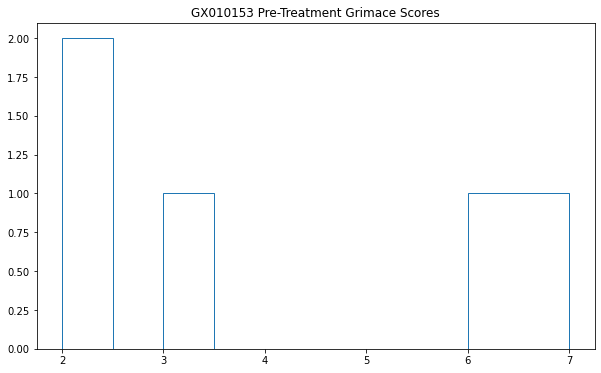

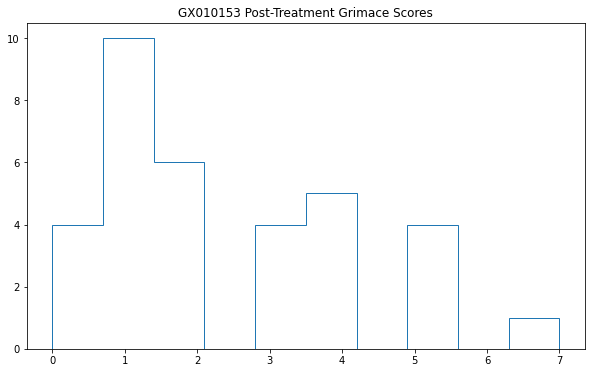

In [457]:

plt.figure(figsize=(10, 6))
counts, bins = np.histogram(pre['Total Grimace Score'])
plt.title(f'{MOUSE_NAME} Pre-Treatment Grimace Scores')
plt.stairs(counts, bins)
plt.show()


plt.figure(figsize=(10, 6))
counts, bins = np.histogram(post['Total Grimace Score'])
plt.title(f'{MOUSE_NAME} Post-Treatment Grimace Scores')
plt.stairs(counts, bins)
plt.show()

In [299]:
data_dict = {} # name --> data
key = {} # name --> group

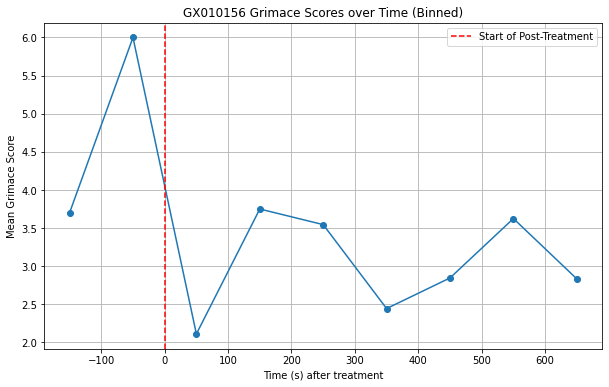

{'GX010153': 0    4.500000
1    1.000000
2    2.090909
3    1.250000
4    2.000000
5    3.142857
6    2.400000
7    3.666667
Name: Total Grimace Score, dtype: float64, 'GX010154': 0    7.000000
1         NaN
2    2.333333
3    4.111111
4    4.833333
5    2.000000
6    3.000000
7    1.500000
Name: Total Grimace Score, dtype: float64, 'GX010157': 0    2.750000
1    2.400000
2    2.700000
3    3.625000
4    1.750000
5    2.500000
6    3.111111
7    2.111111
8    2.166667
Name: Total Grimace Score, dtype: float64, 'GX010158': 0    4.666667
1    5.500000
2         NaN
3    3.500000
4    3.000000
5    3.000000
6    3.000000
7    4.000000
Name: Total Grimace Score, dtype: float64, 'GX010160': 0         NaN
1    4.500000
2    2.800000
3    3.909091
4    3.071429
5    3.500000
6    3.176471
7    2.812500
8    1.500000
Name: Total Grimace Score, dtype: float64, 'GX010155': 0     NaN
1    4.50
2    1.50
3    2.00
4    3.00
5     NaN
6    1.00
7     NaN
8    1.75
Name: Total Grimace Score, dtype: 

In [395]:
# Define your variables
MOUSE_NAME = 'GX010156'
GROUP = 'B'
SUFFIX = "_full.csv"
FILEPATH = "results/" + MOUSE_NAME + "/" + MOUSE_NAME + SUFFIX
tt = pd.read_csv("results/" + MOUSE_NAME + "/" + MOUSE_NAME + "_treated.csv")
POSTTREATMENT_START_TIME = int(tt['Timestamp(x)'][0])

# Load the data
df = pd.read_csv(FILEPATH)

# Adjust the data for the shift
df['Time_since_start'] = df['Unnamed: 0'] - POSTTREATMENT_START_TIME

# Bin the data over 100-second intervals and calculate the mean Grimace Score within each interval
bins = np.arange(-200, df['Time_since_start'].max() + 101, 100)  # Define bin edges
df_binned = df.groupby(pd.cut(df['Time_since_start'], bins))['Total Grimace Score'].mean().reset_index()
#df_binned['Total Grimace Score'] = [v if str(v) != 'nan' else 0 for v in df_binned['Total Grimace Score'].values]

lst = list(df_binned['Time_since_start'].values)
xs = np.arange(-150, df['Time_since_start'].max() + 51, 100)

data_dict[MOUSE_NAME] = df_binned['Total Grimace Score']
key[MOUSE_NAME] = GROUP

# Plot the binned data
plt.figure(figsize=(10, 6))
plt.plot(xs, df_binned['Total Grimace Score'], marker='o', linestyle='-')
plt.xlabel('Time (s) after treatment')
plt.ylabel('Mean Grimace Score')
plt.title(f'{MOUSE_NAME} Grimace Scores over Time (Binned)')
plt.axvline(x=0, color='red', linestyle='--', label='Start of Post-Treatment')
plt.legend()
plt.grid(True)
plt.show()

print(data_dict)
print(key)

print(df_binned)
print(xs)

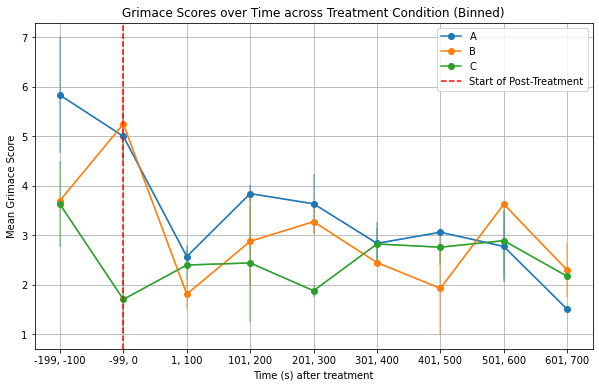

,"-199, -100","-99, 0","1, 100","101, 200","201, 300","301, 400","401, 500","501, 600","601, 700",Group
GX010153,4.500000,1.0,2.090909,1.250000,2.000000,3.142857,2.400000,3.666667,NaN,C
GX010154,7.000000,NaN,2.333333,4.111111,4.833333,2.000000,3.000000,1.500000,NaN,A
GX010157,2.750000,2.4,2.700000,3.625000,1.750000,2.500000,3.111111,2.111111,2.166667,C
GX010158,4.666667,5.5,NaN,3.500000,3.000000,3.000000,3.000000,4.000000,NaN,A
GX010160,NaN,4.5,2.800000,3.909091,3.071429,3.500000,3.176471,2.812500,1.500000,A
GX010155,NaN,4.5,1.500000,2.000000,3.000000,NaN,1.000000,NaN,1.750000,B
GX010156,3.700000,6.0,2.111111,3.750000,3.545455,2.444444,2.846154,3.625000,2.833333,B


In [439]:
all_binned = pd.DataFrame(data_dict.values(), data_dict.keys())
#print(data_dict.values())
all_binned.columns = ['-199, -100', '-99, 0', '1, 100', '101, 200', '201, 300', '301, 400', '401, 500', '501, 600', '601, 700']
all_binned['Group'] = [key[i] for i in all_binned.index.values]
#all_binned.loc['mean'] = all_binned.mean()
grouped = all_binned.groupby(by='Group').mean()
sem = all_binned.groupby(by='Group').sem()

grouped.to_csv('grouped.csv')
sem.to_csv('sem.csv')

plt.figure(figsize=(10, 6))
for i, g in enumerate(grouped.index.values):
    plt.plot(grouped.columns, grouped.loc[g], label=g, color=f'C{i}', marker='o', linestyle='-')
    plt.errorbar(grouped.columns, grouped.loc[g], yerr=sem.loc[g], color=f'C{i}', linestyle='-', alpha=0.5)  # Use the same color as mean data points

plt.xlabel('Time (s) after treatment')
plt.ylabel('Mean Grimace Score')
plt.title('Grimace Scores over Time across Treatment Condition (Binned)')
plt.axvline(x=1, color='red', linestyle='--', label='Start of Post-Treatment')
plt.legend()
plt.grid(True)
plt.show()

#plt.scatter(grouped)
#plt.plot(df['Timestamp(x)'].values, df['Total Grimace Score'].values)

#print(xs)
grouped
all_binned

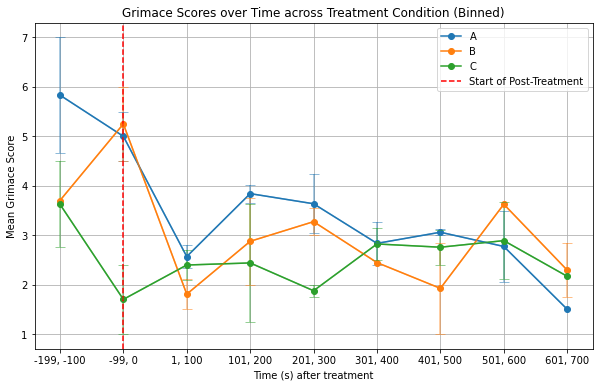

In [437]:
plt.figure(figsize=(10, 6))

# Loop through each group
for i, g in enumerate(grouped.index.values):
    # Plot mean data points
    plt.plot(grouped.columns, grouped.loc[g], label=g, color=f'C{i}', marker='o', linestyle='-')
    
    # Plot error bars for SEM
    plt.errorbar(grouped.columns, grouped.loc[g], yerr=sem.loc[g], color=f'C{i}', linestyle='-', alpha=0.5, capsize=5)  # Use the same color as mean data points
    
    # Calculate top and bottom boundaries for error bars
    top = grouped.loc[g] + sem.loc[g]
    bottom = grouped.loc[g] - sem.loc[g]
    

plt.xlabel('Time (s) after treatment')
plt.ylabel('Mean Grimace Score')
plt.title('Grimace Scores over Time across Treatment Condition (Binned)')
plt.axvline(x=1, color='red', linestyle='--', label='Start of Post-Treatment')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
grouped

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, g in enumerate(grouped.index.values):
    colors = ['orange' if x > 0 else 'blue' for x in shifted_x]
    bars = ax.bar(shifted_x, df['Total Grimace Score'], width=2, color=colors)

    # Plot mean data points
    plt.plot(grouped.columns, grouped.loc[g], label=g, color=f'C{i}', marker='o', linestyle='-')
    
    # Plot error bars for SEM
    plt.errorbar(grouped.columns, grouped.loc[g], yerr=sem.loc[g], color=f'C{i}', linestyle='-', alpha=0.5, capsize=5)  # Use the same color as mean data points
    
    # Calculate top and bottom boundaries for error bars
    top = grouped.loc[g] + sem.loc[g]
    bottom = grouped.loc[g] - sem.loc[g]

# Add scatter plot on top of the bar plot with color conditions (using the shifted x-values)
dot_colors = ['orange' if x > 0 else 'blue' for x in shifted_x]
ax.scatter(shifted_x, df['Total Grimace Score'], color=dot_colors)

# Add vertical dashed line at new x = 0
plt.axvline(x=0, color='red', linestyle='--', label='Start of Post-Treatment')

plt.xlabel('Time (s) after treatment')
plt.ylabel('Total Grimace Score')
plt.title(f'{MOUSE_NAME} Grimace Scores over Time')

# Adjusting x-ticks: set ticks and labels for every 50 values before and after 0
min_tick = int(shifted_x.min() // 50) * 50
max_tick = int(shifted_x.max() // 50) * 50
ticks = np.arange(min_tick, max_tick + 1, 50)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)  # Labels now represent the shifted values

plt.legend()

# Set the minimum y-axis limit slightly below zero to make zero values visible
ax.set_ylim(bottom=-0, top=8)  # Adjust as needed

plt.show()

In [434]:
ah = pd.read_csv("ah.csv")
ah

,Mouse ID,Treatment Group,Stage,Viable Values,Total Values,Average MGS Score,Median MGS Score,Percent Retained
0,GX010154,PLpro vehicle,FULL,37,797,3.70,4.0,4.64%
1,GX010154,PLpro vehicle,PRE-TREATMENT,1,108,7.00,7.0,0.93%
2,GX010154,PLpro vehicle,POST-TREATMENT,36,609,3.61,3.5,5.91%
3,GX010153,10 μM PLpro,FULL,40,897,2.53,2.0,4.46%
4,GX010153,10 μM PLpro,PRE-TREATMENT,5,250,4.00,3.0,2.0%
5,GX010153,10 μM PLpro,POST-TREATMENT,34,554,2.38,2.0,6.14%
6,GX010155,0.1 μM PLpro,FULL,12,777,2.17,2.0,1.54%
7,GX010155,0.1 μM PLpro,PRE-TREATMENT,2,64,4.50,4.5,3.13%
8,GX010155,0.1 μM PLpro,POST-TREATMENT,10,670,1.70,2.0,1.49%
9,GX010156,0.1 μM PLpro,FULL,80,897,3.15,3.0,8.92%


In [402]:
intervals

['-199, -100',
 '-99, 0',
 '1, 100',
 '101, 200',
 '301, 400401, 500',
 '501, 600',
 '601, 700']

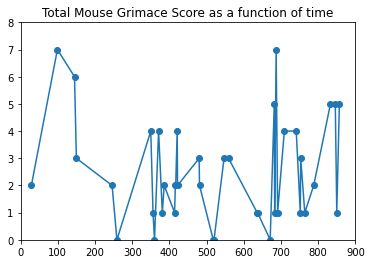

In [85]:
def raw_traces(df_name):
    df_name = f+".csv"
    df = pd.read_csv(df_name)
    df = df.dropna(subset=['Total Grimace Score'])
    plt.ylim(0, 8)
    plt.xlim(0, 900)
    plt.title("Total Mouse Grimace Score as a function of time")
    plt.scatter(df['Timestamp(x)'].values, df['Total Grimace Score'].values)
    plt.plot(df['Timestamp(x)'].values, df['Total Grimace Score'].values)

raw_traces(f+".csv")

In [69]:
csv_files = glob.glob('*mouse*.csv')
csv_files = sorted(list(csv_files))
csv_files

[]

In [22]:
def read_files(root, mouse):
    os.chdir(root)
    csv_files = glob.glob('*.csv')
    csv_files = sorted(list(csv_files))
    
    # only includes data csv files named based on starting second to ending second naming system
    # does not remerge finished csv with original data files if this is run twice
    csv_files = [f for f in csv_files if f[:1].isdigit()]
    
    global data
    data = pd.DataFrame()

    i=0
    last_ts = 0
    last_frame = 0
    for f in csv_files:
        df = pd.read_csv(f)
        df, last_ts, last_frame = adjust_indices(df, last_ts, last_frame)
        df.insert(0, "Interval", len(df.index.values)*["Clip " + str(i+1) + ": " + str(f)][:3])
        data = pd.concat([data, df])
        i += 1
        
    data.index = pd.Index(range(len(data.index)))

def adjust_indices(df, ts, frame):
    df.loc[:, "Frame Index"] = df.loc[:, "Frame Index"].values + frame
    df.loc[:, "Timestamp(x)"] = df.loc[:, "Timestamp(x)"].values + ts
    return df, ts+30, frame+7200

def save_full_csv(root, mouse):
    os.chdir(root)
    output = mouse + '.csv'
    data.to_csv(output)
    
def save_ctrl_vs_treated(root, mouse, st, click):
    os.chdir(root)
    before = mouse + '_control.csv'
    after = mouse + '_treated.csv'
    st = float(str(st).zfill(3))
    click = float(str(click).zfill(3))
    ctrl = data.loc[data["Timestamp(x)"] <= st] # split across before and after
    treated = data.loc[data["Timestamp(x)"] >= click]
    ctrl.to_csv(before)
    treated.to_csv(after)
    
    
def save_ctrl_vs_treated2(root, mouse, vid1, frame_st, vid2, frame_click,):
    """
        Alternate helper method which reads in user friendly inputs. Get index numbers
        and starting times of filenames from PainFace.
    """
    os.chdir(root)
    before = mouse + '_control.csv'
    after = mouse + '_treated.csv'
    #vid1 = 
    ctrl = data.loc[data["Frame Index"] <= frame_st+vid1*240] # split across before and after
    treated = data.loc[data["Timestamp(x)"] >= after]
    ctrl.to_csv(before)
    treated.to_csv(after)

cwd = os.getcwd()
print(cwd)
read_files(cwd, f)
save_full_csv(cwd, 'f)
save_ctrl_vs_treated(cwd, 'MOUSE_A', 170, 240)
data

/Users/anishaiyer/Desktop/GitHub/cv-for-nasal-pain-assay


KeyError: 'Timestamp(x)'

In [293]:
csv = pd.read_csv("sampling-rate/mouse_a_viables.csv")

def clean_viables(csv):
    csv.columns = csv.loc[4]
    csv = csv.drop(list(range(5)))
    csv.index = pd.Index(range(len(csv.index)-5))
    csv = csv.drop(columns=['Clip number'])
    return csv

def to_dict(csv, fau_names):
    arrs = dict(csv)
    for k in fau_names:
        arrs[k] = dict(arrs[k].dropna())
        for i in arrs[k].keys():
            vals = arrs[k][i].split(',')
            #temp = []
            #for v in vals:
                #if v.isdigit():
                    #temp.append(int(v))
            vals = [int(v) for v in vals]
            arrs[k][i] = vals
    return arrs

#clean = clean_viables(csv)
csv

,"If all boxes in a category are correct, but there is an extra box which is not correct, it's counted as 0",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,FAU 1 and 2 labels do not correspond with FAU ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Put frame identities under each column, not to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Video name:,MOUSE_A.MP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Frame Indices:,NaN,NaN,get from code,NaN,NaN
4,Clip number,Start of interval (s),Orbital 1,Orbital 2,Nose,Whiskers,Ear 1,Ear 2,Viable indices,Notes,NaN
5,1,0,9,NaN,NaN,NaN,"0, 1, 2, 4",NaN,9,barely,NaN
6,2,30,"11, 23, 24, 25",NaN,NaN,NaN,"2, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18...","14, 15, 16, 22, 29","11, 24, 25",23 has 1 correct orbital box and 1 incorrect b...,NaN
7,3,60,"4, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, ...",20,"5, 18, 19, 20, 22, 23, 24, 25, 26",NaN,"0, 1, 2, 3, 4, 5, 6, 9, 13, 15, 16, 17, 18, 19...","9,13, 20",NaN,"8,16 have 1C/1NC orbital box",23 has 1C/1NC ears
8,4,90,"0, 3, 4, 5, 6, 13, 14, 15, 16, 26",13,"1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 23",NaN,"0, 1, 2, 4, 6, 7, 13, 14, 15, 16, 17, 19, 21, ...","16, 19, 24",NaN,6 has face box,17 has 1C/1NC ears
9,5,120,"1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 22, 23",13,"2, 4, 5, 6, 12, 13, 14, 15, 16, 23",NaN,"1, 2, 4, 5, 11, 13, 14, 15, 16, 17, 19, 21, 22...","13, 15, 16, 19, 24",NaN,NaN,NaN


In [292]:
faus = ['Orbital 1', 'Orbital 2', 'Nose', 'Whiskers', 'Ear 1', 'Ear 2']
arrs = to_dict(clean,faus)
arrs

{'Start of interval (s)': 0       0
 1      30
 2      60
 3      90
 4     120
 5     150
 6     180
 7     210
 8     240
 9     270
 10    300
 11    330
 12    360
 13    390
 14    420
 15    450
 16    480
 17    510
 18    540
 19    570
 20    600
 21    630
 22    660
 23    690
 24    720
 25    750
 26    780
 27    810
 28    840
 29    870
 Name: Start of interval (s), dtype: object,
 'Orbital 1': {0: [9],
  1: [11, 23, 24, 25],
  2: [4, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
  3: [0, 3, 4, 5, 6, 13, 14, 15, 16, 26],
  4: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 22, 23],
  5: [17, 18, 19, 20],
  7: [27, 28, 29],
  8: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 14],
  9: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 19, 20, 21, 22, 25],
  10: [1, 2, 3, 4, 15, 16, 21, 22, 23, 24, 25, 26, 27],
  11: [1, 3, 8, 10, 11, 14],
  12: [20, 23, 24, 29],
  13: [23, 25, 26]},
 'Orbital 2': {2: [20], 3: [13], 4: [13]},
 'Nose': {2: [5, 18, 19, 20, 22, 23, 24, 25, 26],
  3: [1, 2, 3, 4, 5, 12, 13

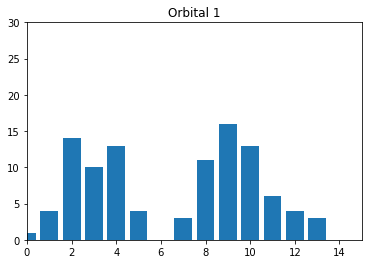

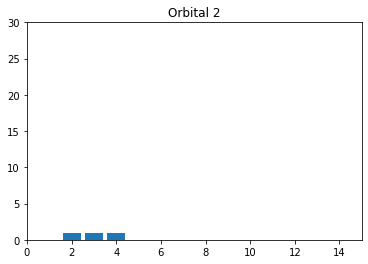

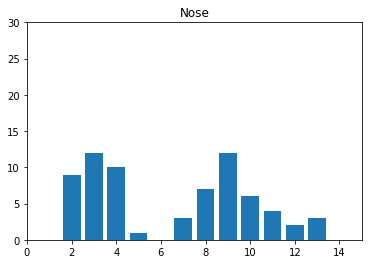

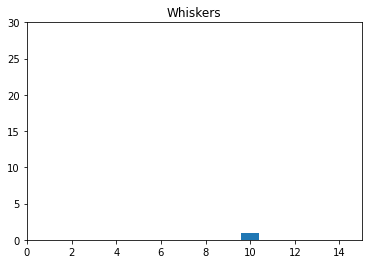

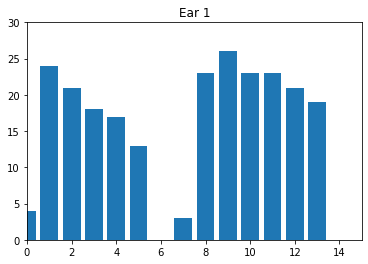

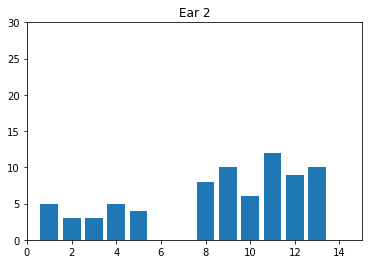

<Figure size 432x288 with 0 Axes>

In [288]:
for f in faus:
    d = arrs[f]
    counts = [len(v) for v in d.values()]
    plt.title(f)
    plt.xlim(0, 15)
    plt.ylim(0, 30)
    plt.bar(d.keys(), counts)
    plt.show()
    plt.savefig(f+'.png')

In [245]:
FAU_NAMES = data.columns[3:7]
CONF_NAMES = data.columns[10:14]

# have user input viable indices where bounding boxes are accurate
viables = [11, 24, 25]
faus = data.loc[viables, FAU_NAMES]
fau_arr = np.asarray(faus)
confs = data.loc[viables, CONF_NAMES]
conf_arr = np.asarray(confs)

clean_data = faus.join(confs)
clean_data

,Timestamp(x),Orbital,Nose,Ears,AU Scored,Confidence(Orbital),Confidence(Nose),Confidence(Ears)
11,11.011,-1,-1,-1,0,0.000000,0.000000,0.000000
24,24.024,0,2,2,3,0.998753,0.991525,0.999983
25,25.025,1,0,1,3,0.998814,0.788076,1.000000


In [13]:
fau_arr
conf_arr

array([[3.        , 0.99990129, 0.        , 0.99804413],
       [2.        , 0.90824449, 0.        , 0.56698865],
       [3.        , 0.99999976, 0.        , 0.99974674]])

In [15]:
def get_all_fau_scores(data):
    """
        Get data per FAU without filtering for manually confirmed bounding box accuracy.
        Run the same analytics as with clean data on all timestamps of the data matrix without checking
        whether the bounding boxes were correctly identified at those points.
    """
    
    THRESHOLD = 0.90
    
    faus = {}
    fs_sorted = {}
    times = {}
    
    for i in range(len(FAU_NAMES)):
        fau = FAU_NAMES[i]
        conf = CONF_NAMES[i]
        
        mgs = data[fau].where(data[conf] >= THRESHOLD).dropna()
        mgs_sorted = data.sort_values(conf, ascending=False)[fau]
        sorted_arrs = np.asarray(mgs_sorted)
        print(mgs)
        #print(mgs_sorted, "\n")
        faus[fau] = np.asarray(mgs)
        print("index", mgs.index, "\n")
        times[fau] = mgs.index
        fs_sorted[fau] = sorted_arrs
    
    return faus, times, fs_sorted

def get_clean_fau_analytics():
    """
        Get clean data per FAU after filtering for high confidence scores only.
        
        For each Facial Action Unit, filter for datapoints that correspond to high confidence values.
        
        Returns 3 dictionaries with:
            - Faus: data arrays with all high confidence scores organized by FAU identity
            - Times: label arrays containing timestamp identity for each included confidence score per FAU
            - Scores sorted: dataframes containing all FAU scores sorted by confidence across each individual column
    """
    THRESHOLD = 0.90
    
    faus = {}
    fs_sorted = {}
    times = {}
    
    for i in range(len(FAU_NAMES)):
        fau = FAU_NAMES[i]
        conf = CONF_NAMES[i]
        
        mgs = clean_data[fau].where(clean_data[conf] >= THRESHOLD).dropna()
        mgs_sorted = clean_data.sort_values(conf, ascending=False)[fau]
        sorted_arrs = np.asarray(mgs_sorted)
        faus[fau] = np.asarray(mgs)
        times[fau] = mgs.index
        fs_sorted[fau] = sorted_arrs
    
    return faus, times, fs_sorted

def display_analytics_report(faus, times, fs_sorted):
    # user friendly report:
    
    tstamps = {}
    [tstamps.update({k:np.asarray(data.loc[times[k], "Timestamp(x)"])}) for k in times.keys()]
    
    print("*** COMPLETED FAU ANALYTICS ON CLEAN DATAFRAME ***\n\n")
    
    for fau in faus.keys():
        print("\n\n**", fau, "**\n\n")
        print("For", fau, "Facial Action Unit:\n")
        print("High confidence Mouse Grimace Scale scores for this clip:\n", faus[fau])
        print("\nCorresponding timestamps for high confidence MGS score:\n", tstamps[fau])
        print("\nAll viable Mouse Grimace Scale scores descending order of Confidence Score:\n", fs_sorted[fau])
    

def get_fau_scores(viables, fau, conf):
    """
        Get arrays of Facial Action Unit scores across each row of data that has been determined to be viable through visual inspection.
        IGNORE. not pursuing this anymore.
    """
    THRESHOLD = 0.90
    
    fau_mgs = {}
    for fau in FAU_NAMES:
        fau_mgs[str(fau)] = []
    
    for v in range(len(viables)):
        for fi in range(len(fau)):
            if conf[v][fi] >= THRESHOLD:
                pass
                #print(fau_mgs[list(fau_mgs.keys())[fi]], fau[v][fi])
                #fau_mgs[list(fau_mgs.keys())[fi]].append(fau[v][fi])
    
    print(fau_mgs)
    return NotImplemented



f,t,s = get_clean_fau_analytics()
display_analytics_report(f,t,s)

*** COMPLETED FAU ANALYTICS ON CLEAN DATAFRAME ***




** Timestamp(x) **


For Timestamp(x) Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 [11.011 24.024 25.025]

Corresponding timestamps for high confidence MGS score:
 [11.011 24.024 25.025]

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [11.011 25.025 24.024]


** Orbital **


For Orbital Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 [0 0 1]

Corresponding timestamps for high confidence MGS score:
 [11.011 24.024 25.025]

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [1 0 0]


** Nose **


For Nose Facial Action Unit:

High confidence Mouse Grimace Scale scores for this clip:
 []

Corresponding timestamps for high confidence MGS score:
 []

All viable Mouse Grimace Scale scores descending order of Confidence Score:
 [-1 -1 -1]


** Ears **


For Ears Facial Action Unit:

High confidence Mouse Grimace Scale

In [16]:
def get_clean_rows(temp):
    """
        Get clean data per row after filtering for high confidence rows only.
        
        Filter for rows that correspond to high average confidence value across Facial Action Units.
        Returns a dictionary with viable FAU scores at timepoints of accurate bounding box classification and high confidence scores across facial action units.
    """
    THRESHOLD = 0.90
    
    # insert new column with average confidence value
    if "Avg Confidence" in temp.columns.values:
        temp = temp.drop(columns=['Avg Confidence'])
    temp.insert(len(temp.columns), "Avg Confidence", np.mean(np.asarray(temp.loc[:, CONF_NAMES]), axis=1))
    filtered = temp.sort_values(by='Avg Confidence', ascending=False)
    fau = filtered.loc[:, FAU_NAMES]
    conf = filtered.loc[:, CONF_NAMES]
    avg = filtered.loc[:, 'Avg Confidence']
    filtered = fau.join(avg)
    # join confidence columns as well
    #filtered = fau.join(avg).join(conf)
    
    return filtered
    
get_clean_rows(data)

,Timestamp(x),Orbital,Nose,Ears,Avg Confidence
28,28.028,0,0,2,1.749410
52,52.022,1,0,0,1.745738
38,38.008,1,2,2,1.745405
53,53.023,1,0,0,1.720748
49,49.019,1,0,0,1.715644
56,56.026,1,0,0,1.639012
30,30.000,0,2,0,1.499948
46,46.016,0,0,2,1.499862
54,54.024,1,0,1,1.483923
50,50.020,1,2,1,1.343722
